In [15]:
import cobra
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('../../../code/')
import leakage
import utils
import FBA_leak
from pathlib import Path

# E. coli iJO1366 dynamic pFBA

In [16]:
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
model.reactions.F6PA_TG_forward.knock_out()
# model.reactions.F6PA.bounds = (-1000,0)



# model = cobra.io.read_sbml_model('../models/e_coli/e_coli_core.xml')
model.solver = 'gurobi'
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 20)
D1 = FBA_leak.dFBA(iterations = 200, dt = 0.1, method = "pFBA", store_exchanges_flag = False, pfba_fraction = 0.95)
D1.add_models(model_name_dict)
# Set Km and vMax
D1.models[model_name].set_km("glc__D_e", 1)
D1.models[model_name].set_Vmax("glc__D_e", 10)
# D1.models[model_name].set_Vmax("o2_e", 100)



D1.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])
D1.run()
print(D1.biomass_df)

AttributeError: module 'cobra' has no attribute 'core'

In [ ]:
df = D1.medium.get_concentrations_df()
df

# Make auxotrophs
Using data from Mee et al., 2014 https://www.pnas.org/doi/epdf/10.1073/pnas.1405641111
R: argA,
C: cysE,
G: glyA,
H: hisB,
I: ilvA,
L: leuB,
K: lysA,
M: metA,
F: pheA,
P: proA,
S: serA,
T: thrC,
W: trpC,
Y: tyrA

In [17]:
KO_strain_dict = {
'R': 'argA',
'C': 'cysE',
'G': 'glyA',
'H': 'hisB',
'I': 'ilvA',
'L': 'leuB',
'K': 'lysA',
'M': 'metA',
'F': 'pheA',
'P': 'proA',
'S': 'serA',
'T': 'thrC',
'W': 'trpC',
'Y': 'tyrA'
}

In [18]:
# model = cobra.io.read_sbml_model('../../models/e_coli/iJR904.xml')
# model = cobra.io.read_sbml_model('../../models/e_coli/iJO1366.xml')
# model = cobra.io.read_sbml_model('../../models/e_coli/e_coli_core.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')


In [19]:
temp = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')
for g in model.genes:
    g.name = temp.genes.get_by_id(g.id).name

In [20]:
folder = Path('../../../models/e_coli/ko/')


model.solver = 'gurobi'
model_dict = {}
for key, gene_name in KO_strain_dict.items():
    M = model.copy()
    genes = [g for g in M.genes if g.name == gene_name]
    for g in genes:
        g.knock_out()
    # rxns = cobra.manipulation.knock_out_model_genes(M, genes)
    # print(key, genes)
    if key == 'I':
        # According to the model, tdcB can perform the same function, but we assume this reaction is knocked out anyway here
        M.reactions.THRD_L.bounds = (0,0)
    if key =='G':
        # M.reactions.GLYAT.bounds = (0,1000)
        M.reactions.GLYAT_TG_reverse.bounds = (0,0)            
        M.reactions.THRA.bounds = (0,0)
        M.reactions.THRA2.bounds = (0,0)
    if key =='P':
        # model.reactions.NACODA.bounds = (0,0)
        M.reactions.P5CR.bounds = (0,0)
    if key =='S':
        # M.reactions.GHMT2r.bounds = (0,1000)
        M.reactions.GHMT2r_TG_reverse.bounds = (0,0)
    if key =='T':
        M.reactions.THRA.bounds = (0,1000)
    print(key, genes[0], M.slim_optimize())
    # print(M.metabolites.ser__L_c.summary())
    # cobra.io.write_sbml_model(M, folder/'{0}.xml'.format(key))
    model_dict[key] = M

Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpnavae3v1.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
R b2818 0.0
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpcy0sn7ts.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
C b3607 0.0
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpylie9230.lp
Reading time = 0.02 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
G b2551 0.0
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpv8ib_bft.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
H b2022 0.0
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmptsl8mqnp.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
I b3772 0.0
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmp26_3fc4m.lp
Reading time = 0.01 

In [21]:
model.genes.b0002.knock_out?

Signature: model.genes.b0002.knock_out() -> None
Docstring:
Knockout gene by marking it as non-functional.

Knockout gene by marking it as non-functional and setting all
associated reactions bounds to zero.
The change is reverted upon exit if executed within the model as
context.
File:      ~/opt/anaconda3/lib/python3.9/site-packages/cobra/core/gene.py
Type:      method


# Simulate auxotrophs

In [22]:
model_name = 'R'

model_name_dict = {'I': [model_dict['I'], 0.006], 'R': [model_dict['R'], 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 4)
D = FBA_leak.dFBA(iterations = 100, dt = 0.1, method = "FBA_with_leakage", store_exchanges_flag = False, pfba_fraction = 0.95)
D.add_models(model_name_dict)
# Set Km and vMax
for n in 'IR':
    D.models[model_name].set_km("glc__D_e", 1)
    D.models[model_name].set_Vmax("glc__D_e", 10)



D.medium.define_initial_conditions({"glc__D_e": glucose_mM, 'ile__L_e':0.1, 'arg__L_e':0.1})
D.run()
print(D.biomass_df)

AttributeError: module 'cobra' has no attribute 'core'

In [36]:
D.medium.get_concentrations_df()['ile__L_e']

0     1.000000
1     0.999725
2     0.999429
3     0.999112
4     0.998771
        ...   
95    0.403320
96    0.402865
97    0.402525
98    0.402291
99    0.402154
Name: ile__L_e, Length: 100, dtype: float64

In [35]:
model_name = 'R'

model_name_dict = {'I': [model_dict['I'], 0.006], 'R': [model_dict['R'], 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 4)
D2 = FBA_leak.dFBA(iterations = 100, dt = 0.1, method = "pFBA", store_exchanges_flag = False, pfba_fraction = 0.95)
D2.add_models(model_name_dict)
# Set Km and vMax
for n in 'IR':
    D2.models[n].set_km("glc__D_e", 1)
    D2.models[n].set_Vmax("glc__D_e", 10)
    # D.models[n].set_Vmax("gile__L_e", 10)



D2.medium.define_initial_conditions({"glc__D_e": glucose_mM, 'ile__L_e':1, 'arg__L_e':1})
D2.run()
print(D2.biomass_df)

Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpss10wk9f.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpzlo5nou_.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
dFBA simulation took 6 seconds
    Timepoint  Time         I         R
0           0   0.0  0.006000  0.006000
1           1   0.1  0.006441  0.006441
2           2   0.2  0.006915  0.006915
3           3   0.3  0.007424  0.007424
4           4   0.4  0.007970  0.007970
..        ...   ...       ...       ...
94         94   9.4  1.109008  0.838157
95         95   9.5  1.110794  0.838360
96         96   9.6  1.112192  0.838526
97         97   9.7  1.113227  0.838661
98         98   9.8  1.113923  0.838771

[99 rows x 4 columns]


In [28]:
model.optimize()
print(cobra.flux_analysis.pfba(model))
print(model.summary())

<Solution 699.022 at 0x7fd179c638b0>
Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.9823718127269754

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
     ca2_e     EX_ca2_e  0.005113         0   0.00%
      cl_e      EX_cl_e  0.005113         0   0.00%
 cobalt2_e EX_cobalt2_e 2.456E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0006965         0   0.00%
     fe2_e     EX_fe2_e   0.01578         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       k_e       EX_k_e    0.1918         0   0.00%
     mg2_e     EX_mg2_e  0.008522         0   0.00%
     mn2_e     EX_mn2_e 0.0006788         0   0.00%
    mobd_e    EX_mobd_e 0.0001267         0   0.00%
     nh4_e     EX_nh4_e     10.61         0   0.00%
     ni2_e     EX_ni2_e 0.0003173         0   0.00%
      o2_e      EX_o2_e     17.58         0   0.00%
      pi_e      EX_pi_e    0.9476         0   0.00%
     so4_e     EX_so4_e    0.2478         0   0.00%
     zn2_e     EX_zn2_e  0.000335         0   0.00

Text(0, 0.5, 'Biomass [gDW/L]')

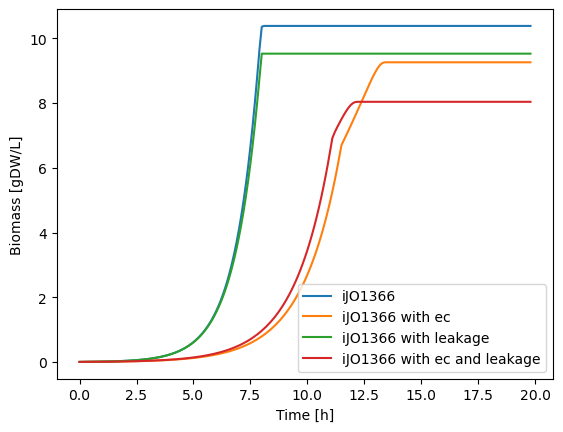

In [10]:
fig, ax = plt.subplots(1)
df = pd.DataFrame()
df['iJO1366'] = D1.biomass_df['Ecoli']
df['iJO1366 with ec'] = D2.biomass_df['Ecoli']
df['iJO1366 with leakage'] = D3.biomass_df['Ecoli']
df['iJO1366 with ec and leakage'] = D4.biomass_df['Ecoli']
df.index = D4.biomass_df['Time']
df.plot(ax=ax)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Biomass [gDW/L]')

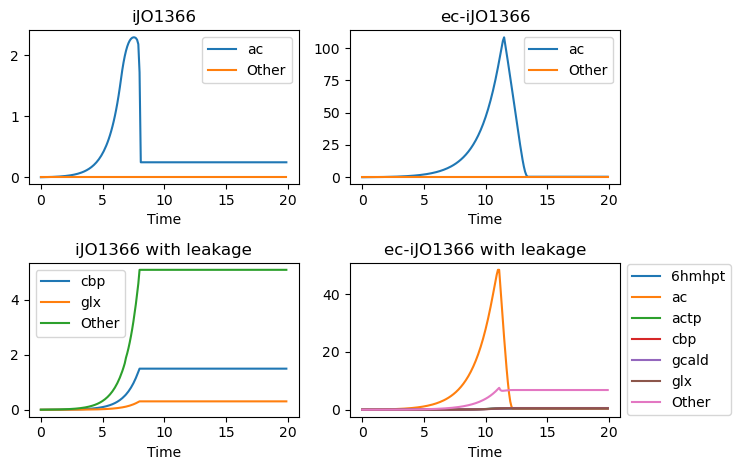

In [25]:
fig, axes = plt.subplots(2,2)

axes = axes.flatten()
labels = [
    'iJO1366',
    'ec-iJO1366',
    'iJO1366 with leakage',
    'ec-iJO1366 with leakage'
]
for i, D in enumerate([D1, D2, D3, D4]):
    
    cdf1 = D.medium.get_concentrations_df()
    cdf1.set_index('Time', inplace = True)
    cdf1.drop(columns=list(cdf1.columns[cdf1.max()==1000])+['Timepoint'], inplace=True)
    cdf1.columns = [x[:-2] for x in cdf1.columns]
    other_columns = cdf1.columns[cdf1.sum()/cdf1.sum().sum() < 0.001]
    cdf1['Other'] = cdf1.loc[:, other_columns].sum(axis = 1)
    cdf1.drop(columns=other_columns, inplace = True)
    cdf1.drop(columns=['co2', 'glc__D', 'hco3'], inplace=True, errors = 'ignore')
    
    cdf1.plot(ax = axes[i])
    
    axes[i].set_title(labels[i])
    plt.tight_layout()
axes[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Have better look at detected mets

In [28]:
detected_mets = ['g6p', 'f6p', 'fdp', 'dhap', 'g3p', '2pg, 3pg', 'pep', 'r5p', 'ru5p__D, ru5p__L, xu5p__D, xu5p__L', 'e4p', 'cit', 'acon_C', 'icit', 'oaa', 'glu__L', 'ser__L', 'asp__L', 'thr__L', 'hom__L', 'tyr__L', 'gly', 'pro__L', 'ala__L', 'met__L', 'val__L', 'phe__L', 'ile__L', 'leu__L', 'trp__L', 'his__L', 'arg__L', 'pyr', 'orot', 'fum', 'ura', 'akg', 'ac']
df = D4.medium.get_concentrations_df()
df.columns = [x[:-2] for x in df.columns]
measured = df.loc[:, [x for x in detected_mets if x in df.columns]]

(1e-08, 10)

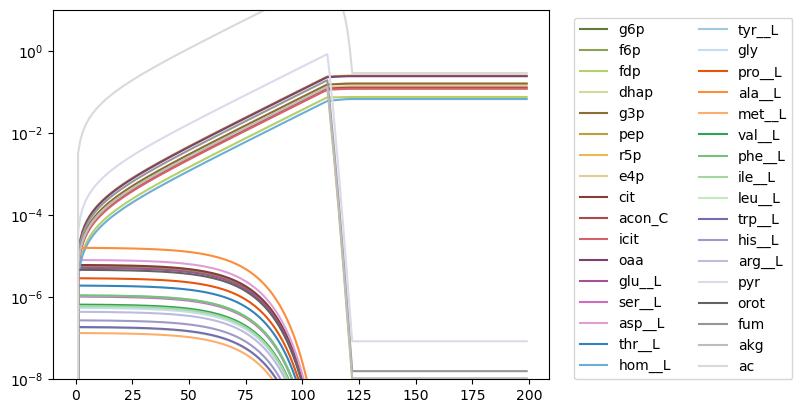

In [46]:
from matplotlib import cm, colors
cmap = colors.ListedColormap(cm.tab20b.colors[4:] + cm.tab20c.colors, name='tab40')

fig, ax = plt.subplots(1)
measured.plot(ax=ax, cmap = cmap)
ax.legend(ncol = 2, loc = (1.05,0))
ax.set_yscale('log')
ax.set_ylim(1e-8,10)


<AxesSubplot:>

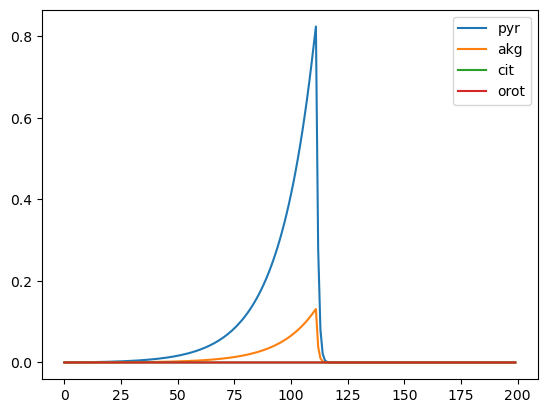

In [34]:
measured[['pyr', 'akg', 'cit', 'orot']].plot()

In [43]:
cdf1.max()

10fthf_e        4.274886e-06
13dpg_e         7.920005e-04
1ddecg3p_e      1.690529e-05
1hdec9eg3p_e    1.337801e-05
1hdecg3p_e      1.099549e-05
                    ...     
utp_e           8.272369e-05
val__L_e        9.259139e-07
xan_e           2.968411e-07
xmp_e           2.469601e-07
xu5p__D_e       7.082279e-04
Length: 233, dtype: float64

In [69]:
# solution = model.optimize()
# carbon_uptake = {}
# for r in model.exchanges:
#     flux = solution.fluxes[r.id]
#     if flux < 0:
#         m = r.metabolites.popitem()[0]
#         try:
#             Nc = m.elements['C']
#         except KeyError:
#             Nc = 0
#         else:
#             carbon_uptake[r.id] = [-flux * Nc, Nc, flux]
        
# cu = pd.DataFrame(carbon_uptake).T
# cu.columns = ['C flux', 'Nc', 'Flux']
# cu.sort_values(by='C flux', ascending = False)
# reduction = 0.1*cu['C flux'].sum()
# new_lower_bounds = {}
# for r_id, row in cu.iterrows():
#     if row['C flux'] > reduction:
#         new_lower_bounds[r_id] = -(row['C flux']-reduction)/row['Nc']
        
# with model as M:
#     for key, value in new_lower_bounds.items():
#         M.reactions.get_by_id(key).lower_bound = value
#     reduced_solution = M.slim_optimize()

In [70]:
m = D.models['Ecoli']

In [ ]:
m.Vmax_dict

In [2]:
# model = cobra.io.read_sbml_model('../../models/e_coli/momentiJO1366.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
# model = cobra.io.read_sbml_model('../../models/e_coli/e_coli_core.xml')

model.solver = 'gurobi'

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-26


In [3]:
# solution = cobra.flux_analysis.pfba(model)

In [4]:
# model.reactions.DHAPT.knock_out()
# model.reactions.THRA.knock_out()
# model.reactions.THRA2.knock_out()
# model.reactions.F6PA.knock_out()

In [5]:
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 4)
D = FBA_leak.dFBA(iterations = 30, dt = 0.2, method = "FBA_with_leakage", store_exchanges_flag = False)#(, pfba_fraction = 0.95)
D.add_models(model_name_dict)

##### Lekage
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmp8q5mw8tt.lp
Reading time = 0.01 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


In [ ]:
# Set Km and vMax
D.models[model_name].set_km("glc__D_e", 1)
D.models[model_name].set_Vmax("glc__D_e", 10)



D.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])

D.run()
print(D.biomass_df)

In [7]:
D.biomass_df

,Timepoint,Time,Ecoli
0,0,0.0,0.006000
1,1,0.2,0.007173
2,2,0.4,0.007173
3,3,0.6,0.007173
4,4,0.8,0.007173
5,5,1.0,0.007173
6,6,1.2,0.007173
7,7,1.4,0.007173
8,8,1.6,0.007173
9,9,1.8,0.007173


In [17]:
s = cobra.flux_analysis.pfba(model)

In [20]:
s

,fluxes,reduced_costs
EX_cm_e,0.000000,-2.0
EX_cmp_e,0.000000,178.2
EX_co2_e,19.675223,-2.0
EX_cobalt2_e,-0.000025,2.0
DM_4crsol_c,0.000219,-2.0
...,...,...
RNDR4,0.000000,-2.0
RNDR4b,0.000000,-2.0
RNTR1c2,0.025705,-2.0
RNTR2c2,0.026541,-2.0
